# Hello Image Classification

This basic introduction to OpenVINO™ shows how to do inference with an image classification model.

A pre-trained [MobileNetV3 model](https://docs.openvino.ai/2023.0/omz_models_model_mobilenet_v3_small_1_0_224_tf.html) from [Open Model Zoo](https://github.com/openvinotoolkit/open_model_zoo/) is used in this tutorial. For more information about how OpenVINO IR models are created, refer to the [TensorFlow to OpenVINO](../101-tensorflow-to-openvino/101-tensorflow-to-openvino.ipynb) tutorial.

## Imports

In [1]:
from pathlib import Path
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np
from openvino.runtime import Core

## Download the Model and data samples

In [2]:
base_artifacts_dir = Path('./modal').expanduser()

model_name = "mobilenet-v3-large-1.0-224-tf"
model_xml_name = f'{model_name}.xml'
model_bin_name = f'{model_name}.bin'

model_xml_path = base_artifacts_dir / "public" / model_name / "FP32" / model_xml_name
print(model_xml_path)

base_url = 'https://storage.openvinotoolkit.org/repositories/openvino_notebooks/models/mobelinet-v3-tf/FP32/'

if not model_xml_path.exists():
    !omz_downloader --name {model_name} --output_dir {base_artifacts_dir}
    !omz_converter --name {model_name} -d {base_artifacts_dir} --output_dir {base_artifacts_dir}

else:
    print(f'{model_name} already downloaded to {base_artifacts_dir}')


modal/public/mobilenet-v3-large-1.0-224-tf/FP32/mobilenet-v3-large-1.0-224-tf.xml
mobilenet-v3-large-1.0-224-tf already downloaded to modal


## Load the Model

In [3]:
ie = Core()
model = ie.read_model(model=model_xml_path)
compiled_model = ie.compile_model(model=model, device_name="CPU")

output_layer = compiled_model.output(0)

## Load an Image

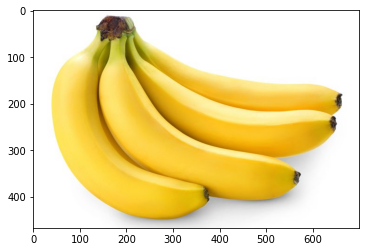

In [4]:
# The MobileNet model expects images in RGB format.
image = cv2.cvtColor(cv2.imread(filename="banana.jpg"), code=cv2.COLOR_BGR2RGB)

# Resize to MobileNet image shape.
input_image = cv2.resize(src=image, dsize=(224, 224))

# Reshape to model input shape.
input_image = np.expand_dims(input_image, 0)
plt.imshow(image);

## Do Inference

In [5]:
result_infer = compiled_model([input_image])[output_layer]
result_index = np.argmax(result_infer)
print(result_index)

954


In [7]:
# Convert the inference result to a class name.
imagenet_classes = open("imagenet_2012.txt").read().splitlines()
# The model description states that for this model, class 0 is a background.
# Therefore, a background must be added at the beginning of imagenet_classes.
#imagenet_classes = ['background'] + imagenet_classes
imagenet_classes = imagenet_classes

imagenet_classes[result_index]

'n07753592 banana'